# Regression

This notebook aims to explain the theory behind linear regression and demonstrate how linear regression can be implemented and interpreted in R. It also provides answers, with reasons, to the regression questions in the EMC course. The notebook is broken into 4 sections: 

* Intuition
* The Underlying Mathematics
* Understanding the Diagnostics
* Transforming the Data
* EMC Questions and Answers

The "Intuition" section gives an explanation of the idea of regression with any mathematics; the "The Underlying Mathematics" section gives a derivation of the regression equations for the case a simple one dimensional line; the "Understanding the Diagnostics" describes how to interpret the outputs of a regression model and assess diagnostics such as "goodness of fit"; the "Transforming the Data" section shows how linear regression can be applied to non-linear data; "A Regression Implementation" section shows an example of applying regression and interpretting the results; the "EMC Quesions and Answers" section gives the answer to the regression questions in the EMC course with explanations.

## Intuition

The simplest way of thinking about regression is probably to imagine learning the equation of the line of best fit. So if we start with some data that is linear, is it possible to learn the line of best fit?

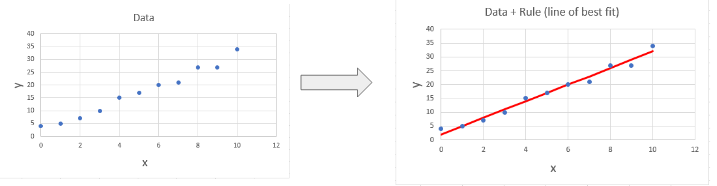

Regression enables us to learn the equation of the line from the data. Regression can be applied to non-linear and higher dimensional data as well. Regression is ideally suited to predicting continuous data over "a large range", however it has been adapted to predict probabilities and counts, these adaptations are known as "general linear models".

## The Underlying Mathematics

The EMC only really requires a notational knowledge of the mathematics of regression. For this reason I have derived the regression equations for a one dimensional problem only, this involves understanding ideas such as partial derivatives and simultaneous equations and should be accessible to anyone with A-level mathematics. If you want to go a little further [Brian Caffo's videos](https://youtu.be/58ZPhK32sU8?list=PLpl-gQkQivXjqHAJd2t-J_One_fYE55tC) give an excellent derivation of the general n dimensional problem using linear algebra. If linear algebra is new to you the Kahn Academy provides an excellent set of videos on the topic. The derivation starts by forming a sum of squares error term based on what the line predicts $\hat{y}_{i}$ and what the actual values are $y_{i}$ for data points 1 to n.

$$error=\sum\limits_{i=1,n}{(\hat{y}_{i}-y_{i})^2}$$

Graphically this looks like:
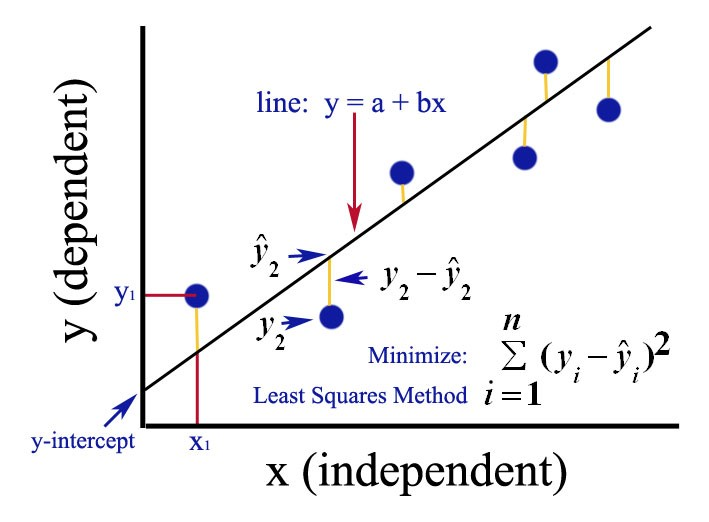


The idea is to use mathematical techniques to minimise this sum and hence get a line that is as close as possible to the data. This process is sometimes refered to as <b>ordinary least squares</b> (required EMC knowledge). As $y_{i}$ it must be related to $x_{i}$ via a linear relationship.

$$y_{i} = a x_{i} + b $$

Substituting into the error equation gives an equation for the error in terms of a and b

$$error(a,b) = \sum\limits_{i=1,n}{(a{x}_{i}+b-{y}_{i})^2}$$

If we hold "b" fixed the above expression is a quadratic in "a"; similarly, if we hold "a" fixed the above expression is quadratic in "b". The code below simulates some data to demonstrate the quadratic nature of this relationship.

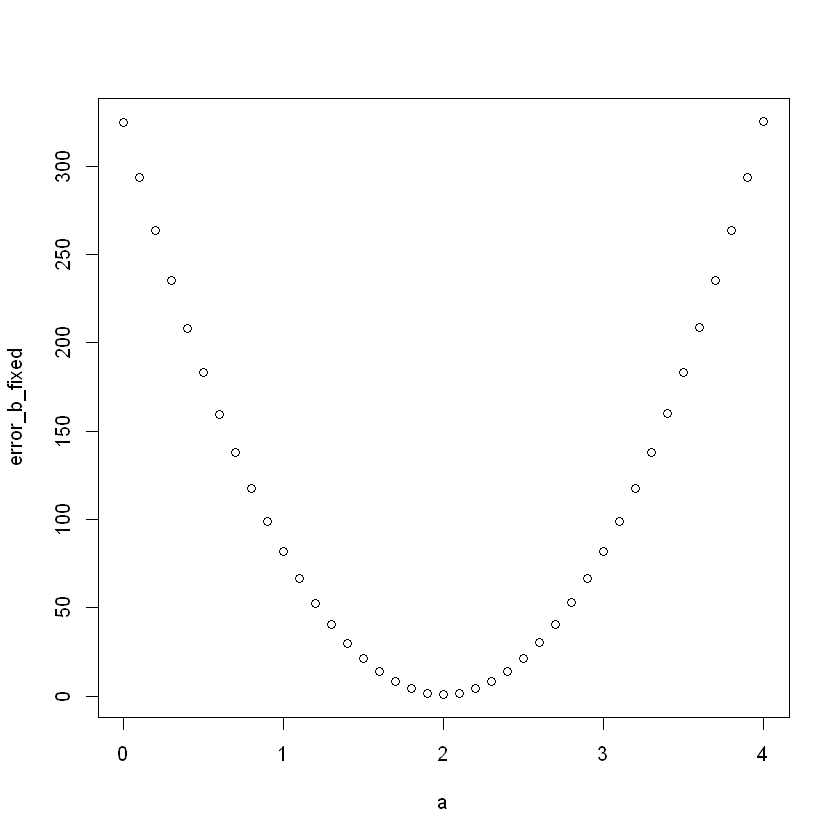

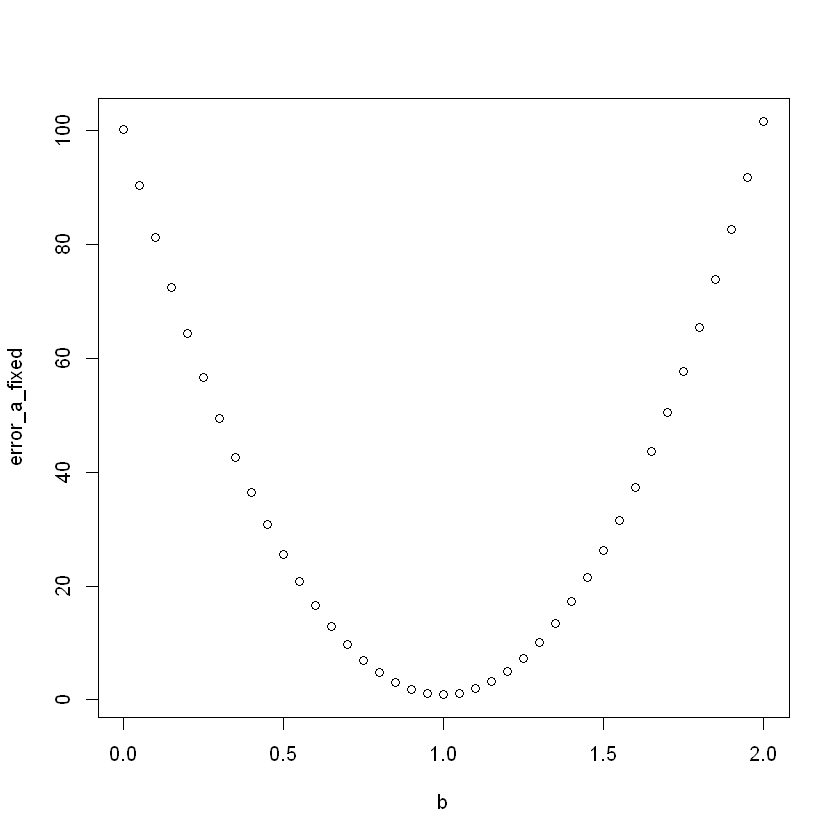

In [11]:
# Defining error functions
error <- function(a,b){
    set.seed(1)
    x <- rnorm(100)
    y <- 2*x + 1 + 0.1*rnorm(100)
    y_hat <- a*x + b
    error <- sum((y_hat - y)^2)
    return(error)
}

# Fixing b

errorb1 <- function(a){
    errorb1 <- error(a,1)
    return(errorb1)    
}

# Fixing a

errora2 <- function(b){
    errorb1 <- error(2,b)
    return(errorb1)    
}


a <- seq(0,4,0.1)
error_b_fixed <- lapply(a, errorb1)
plot(a,error_b_fixed)

b <- seq(0,2,0.05)
error_a_fixed <- lapply(b, errora2)
plot(b,error_a_fixed)

The idea of the derivation, in the general case, is to find an equation for the a minimum with b fixed and an equation for the b minimum with a fixed and solve them simultaneously. To achieve this we take the partial derivative wrt "a" and set it equal to zero and the partial derivative with wrt to "b" and set it equal to zero. If you are not familar with the idea of partial derivates the [Khan academy videos](https://www.khanacademy.org/math/multivariable-calculus) gives a series of lessons. The partial derivative of the error wrt to a is given below. 

$$\frac{\partial e}{\partial a} = 2 \sum\limits_{i=1,n}{x_{i}(a{x}_{i}+b-y_{i})} = 0 \implies \sum\limits_{i=1,n}{x_{i}(a{x}_{i}+b-y_{i})} = 0$$

$$\implies a\sum\limits_{i=1,n}{x_{i}^2} + b\sum\limits_{i=1,n}{x_{i}} - \sum\limits_{i=1,n}{x_{i}y_{i}} = 0 \implies a\sum\limits_{i=1,n}{x_{i}^2} + bn\bar{x} - \sum\limits_{i=1,n}{x_{i}y_{i}} = 0$$

The partial derivative of the error wrt b gives

$$\frac{\partial e}{\partial b} = 2 \sum\limits_{i=1,n}{(a{x}_{i}+b-y_{i})} = 0 \implies an\bar{x} + bn - n \bar{y} = 0$$

$$\implies a\bar{x} + b - \bar{y} = 0$$

I have used 

$$\bar{x} = \frac{\sum\limits_{i=1,n}{x_{i}}}{n}$$ and $$\bar{y} = \frac{\sum\limits_{i=1,n}{y_{i}}}{n}$$

To derive both partial derivative equations. The second partial derivative equation can be written as $b = \bar{y} - a \bar{x}$ and then substituted into the first, which gives

$$a\sum\limits_{i=1,n}{x_{i}^2} - an\bar{x}^{2} + n\bar{x}\bar{y} - \sum\limits_{i=1,n}{x_{i}y_{i}} = 0$$

$$\implies a(\sum\limits_{i=1,n}{x_{i}^2} - n\bar{x}^{2}) = \sum\limits_{i=1,n}{x_{i}y_{i}} - n\bar{x}\bar{y}$$

$$\implies a = \frac{\sum\limits_{i=1,n}{x_{i}y_{i}} - n\bar{x}\bar{y}}{\sum\limits_{i=1,n}{x_{i}^2} - n\bar{x}^{2}}$$

The final equation allows us to calculate the value of a from the data, b can then be found using the equation $b=\bar{y} - a\bar{x}$. To illustrate that this equation "works" I have using it to calculate a and b for some simulated data below.

In [12]:
# number of points
n <- 100
# speed of function data
x <- rnorm(n)
# accuracy of function data
y <- 2*x -3 + rnorm(n)
# working out the coefficients manual
a <- (sum(x*y) - n*mean(x)*mean(y))/(sum(x*x) - n*mean(x)^2)
b <- mean(y)-a*mean(x)
print("a is:")
print(a)
print("b is:")
print(b)


[1] "a is:"
[1] 2.106218
[1] "b is:"
[1] -2.95155


We can then check this matches what R gives us with the "lm" function

In [13]:
fit <- lm(y~x)
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.74179 -0.56139 -0.01749  0.67973  1.84843 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.95155    0.09910  -29.78   <2e-16 ***
x            2.10622    0.09626   21.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9906 on 98 degrees of freedom
Multiple R-squared:  0.8301,	Adjusted R-squared:  0.8284 
F-statistic: 478.8 on 1 and 98 DF,  p-value: < 2.2e-16


The coefficients in the lm summary match the coefficient derived by the model.

## Understanding the Diagnostics

The one dimensional model described above can be extended to any n dimensions and written as

$$y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + ... + \beta_{n} x_{n} $$

In this section we will cover the following diagnostics associated with this model:
* How the coefficient relate to the output 
* How to tell whether the coefficient are significant
* What the The goodness of fit ($R^{2}$) means
* How to plot and interpret residuals
These ideas are explained in the sections below

### Relating the Coefficient to the Output (y)

Imagine you are given a dataset that contains the variables: job performance, speed of function and accurancy of function. You fit a regression line to the model and get the following relationship 

$$y = -3 + 2x_{1} + 4x_{2}$$

Where y is job performance, $x_{1}$ is speed of function and $x_{2}$ is accuracy of function. By matching this equation to the general equation above $\beta_{0} = -3, \beta_{1} = 2 $ and $\beta_{2} = 4$. How can we interpret -3,2 and 4 in relation to job performance y?

-3 is the easiest to interpert it is the job performance achieved with 0 speed of function and 0 accuracy of function. 

To interpret 2, consider increasing $𝑥_{1}$ by 1 and holding $x_{2}$ fixed; it is clear that y would increase by 2. Therefore for every unit increase in speed of function, with accuracy of function remaining fixed job performance increases by 2

Similarly, to interpret 4, consider increasing $𝑥_{2}$ by 1 and holding $x_{1}$ fixed; it is clear that y would increase by 4. Therefore for every unit increase in accuracy of function, with speed of function remaining fixed job performance increases by 4

### Significance of Coefficients

The coefficients ($\beta_{0}$, $\beta_{1}$ etc) that a regression model fits are estimated from data; a different dataset describing the same situation would give different results. As these values are estimates, like the mean of a population, we can think of them in terms of confidence intervals. So, for the job performance example above, the coefficent 2 could in fact be a value in the range 1.7 to 2.3 with say 95% confidence. Similarly, we can think in terms of significance. <b>For a coefficient to be meaningful, we need it's value to be significantly different from 0.</b> Most packages, including R, give a P-Values that allows us to evaluate this. To try and illustrate this idea I have created the "job performance" data using simulation.

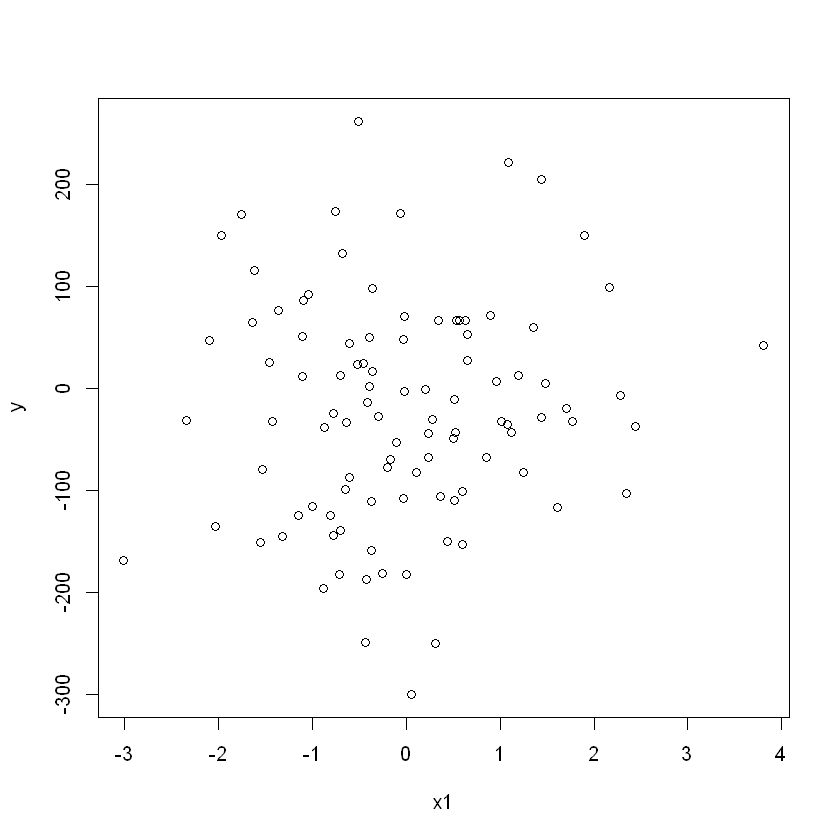

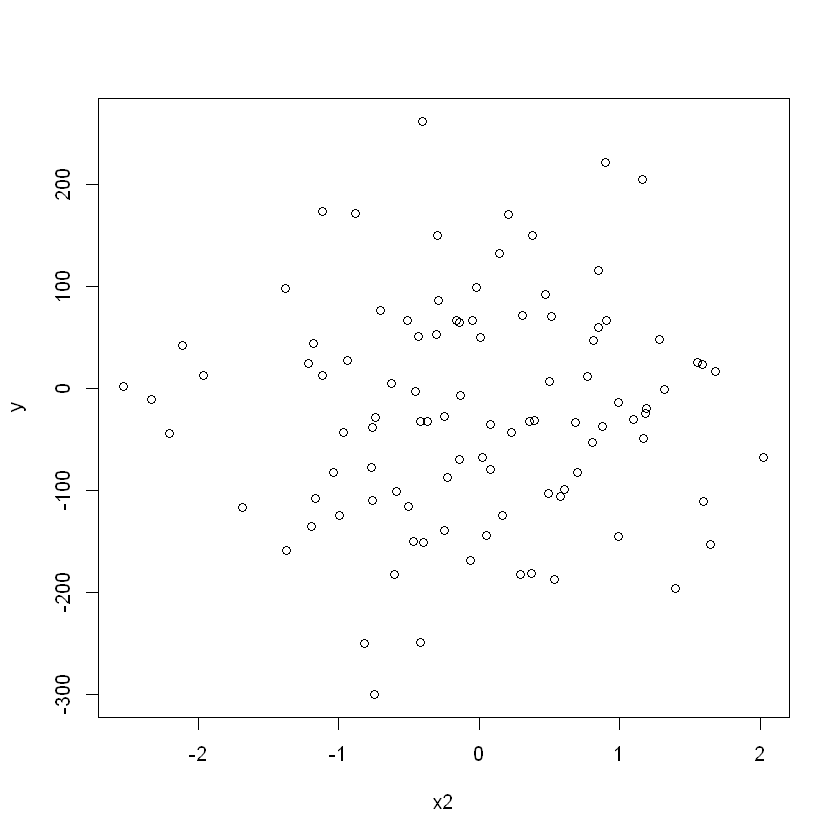

In [14]:
# number of points
n <- 100
# speed of function data
x1 <- rnorm(n)
# accuracy of function data
x2 <- rnorm(n)
# job performance model
noise_factor <- 100.0
y <- -3 + 2*x1 + 4*x2 + noise_factor*rnorm(n)
# plotting the data
plot(x1,y)
plot(x2,y)

The code below fits a regression model to the above data and shows a summary of the results

In [15]:
fit <- lm(y~x1+x2)
summary(fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-273.53  -80.58   -3.22   76.64  290.91 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -22.654     10.915  -2.075   0.0406 *
x1             8.041      9.401   0.855   0.3945  
x2             5.523     11.381   0.485   0.6286  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 109 on 97 degrees of freedom
Multiple R-squared:  0.009184,	Adjusted R-squared:  -0.01125 
F-statistic: 0.4496 on 2 and 97 DF,  p-value: 0.6392


We are interested in the "Estimate" and "Pr(>|t|)" columns of the "Coefficients:" section. The "Estimate" column contains estimates of the coefficients $\beta_{0}$, $\beta_{1}$ and $\beta_{2}$ or -3, 2 and 4 in the data we have generated. 

With the noise factor set to 1, the Estimate values will be quite accurate. However, if you swamp the data with noise (experiment by setting the noise factor to 10 then 100 say) you will see the Estimates values become less accurate. 

The "Pr(>|t|)" values indicate whether the these estimates are significantly different from 0, a value of more than 0.1 indicates that there is a 10% chances that the "Estimate" value is either 0 or of a different sign than the value displayed in the "Estimate" column. Again, experimentation with the noise factor (1,10,100) shows that as the noise increases it becomes difficult for the model to tell whether the coefficients it is predicting are significantly different from 0. The standard 5% rule of thumb applies (i.e. 5% or above means we assume the there is significant evidence to suggest the coefficients could be 0 or of opposite sign)

### Goodness of Fit ($R^{2}$)

The $R^{2}$ diagnostic indicates the proportion of the variance in the data explained by the model. A value of 1 indicates a that all of the variance in the data is explained by the model and a value of 0 indicates that none of the variance in the is explained by the model. I have simulated some 1-dimensional data and fit a regresion model to it below to try and further explain this notion.


Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.247602 -0.064274  0.002291  0.068796  0.308926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.00101    0.01093   274.5   <2e-16 ***
x            3.99660    0.01001   399.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1093 on 98 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9994 
F-statistic: 1.593e+05 on 1 and 98 DF,  p-value: < 2.2e-16


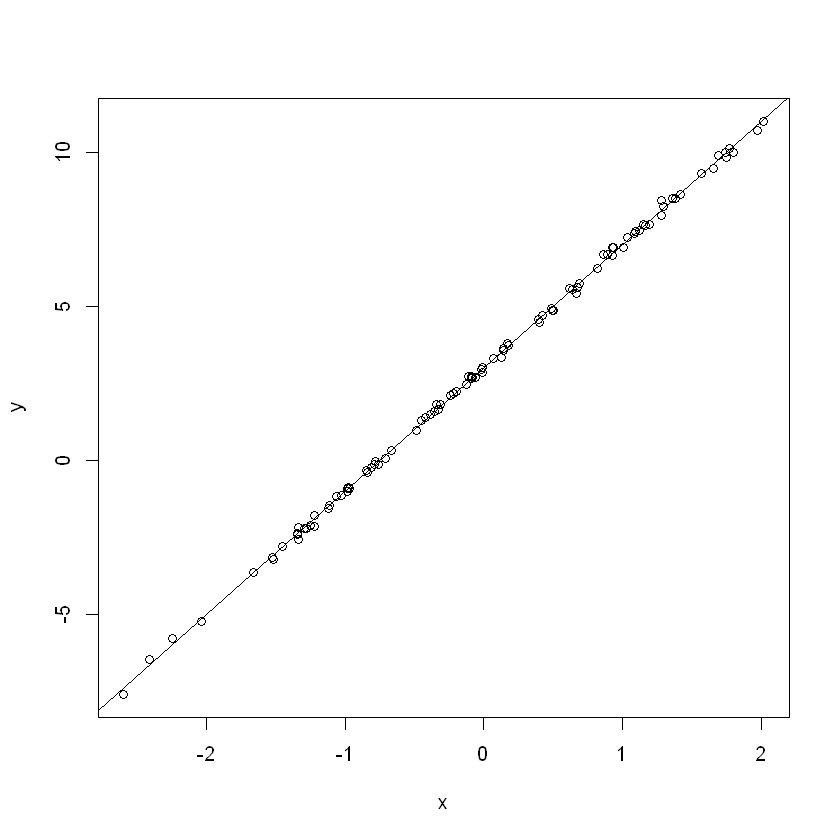

In [7]:
# Simulated data
n <- 100
noise_factor <- 0.1
x <- rnorm(n)
y <- 3 + 4*x + noise_factor*rnorm(n)
# Fit a regression model
fit <- lm(y~x)
plot(x,y)
abline(fit)
summary(fit)

The second from last line of the summary gives the $R^{2}$ values. If you set the noise_factor to 0.1, then all of the points are very close to the line, almost all of the variance is explained by the model and the $R^{2}$ values are close to 1. Increasing the noise_factor to 1,10 and 100 shows that as the points moving further away from the line and the value of $R^{2}$ getting close to 0; this reflects the fact that as the data becomes swamped by noise less of the variance in the data can be explained by the model.

### Residuals & Model Bias

The residuals are simply the difference between the data and the model predictions, the code below calculates the residuals (e) for the model above.

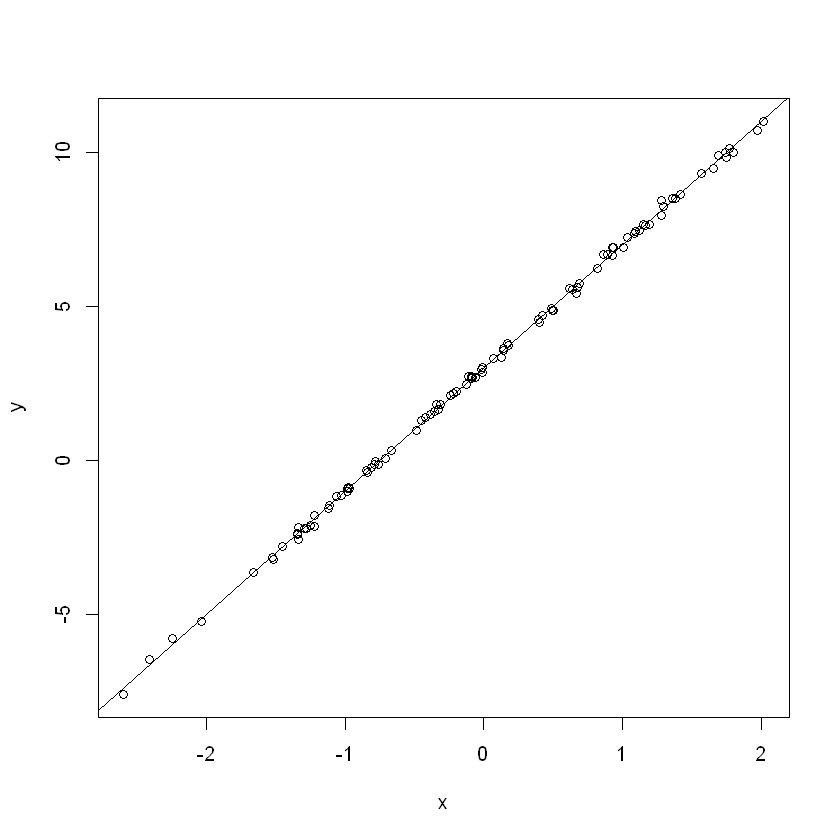

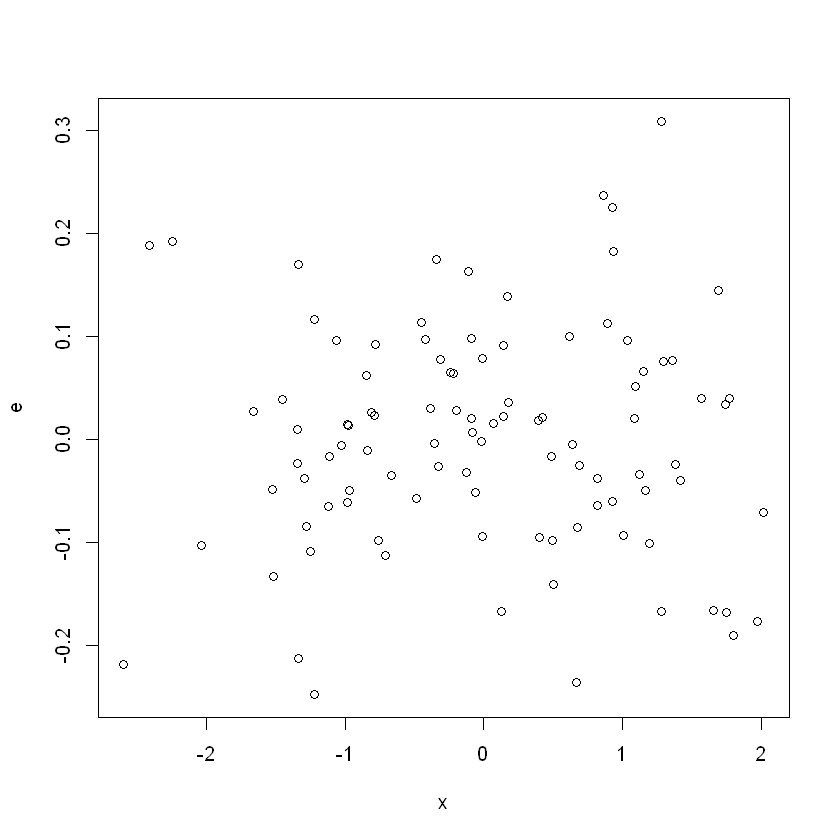

In [8]:
# Calculate residuals
e <- y - predict(fit)
# same plot as above
plot(x,y)
abline(fit)
# residuals plot
plot(x,e)

Residuals effectively "zoom in" on the model errors, this makes them useful for detecting "model bias".

No mathematical model of any kind has ever truely reflected reality, they are simply tools that can be useful if interpretted intelligently. So all models are biased in some way. Residuals are a useful tool when looking for bias in regression models. The code below shows data being generated with one model and a model of a different form being fit to the data.

In [9]:
# number of points
n <- 100
# speed of function data
x1 <- rnorm(n)
# accuracy of function data
x2 <- rnorm(n)
# generating model
noise_factor <- 0.1
model_factor <- 2.0
y <- 1 + x1 + x2 + model_factor*sin(0.1*1:n) + noise_factor*rnorm(n)
fit <- lm(y~x1+x2)
summary(fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5571 -1.1302  0.1876  1.2353  2.0398 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3441     0.1341  10.023  < 2e-16 ***
x1            0.9755     0.1278   7.631 1.62e-11 ***
x2            0.7226     0.1309   5.518 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.341 on 97 degrees of freedom
Multiple R-squared:  0.4851,	Adjusted R-squared:  0.4745 
F-statistic: 45.69 on 2 and 97 DF,  p-value: 1.045e-14


Notice that coefficients are highly significant (very likely to be greater than 0), however the $R^{2}$ value is not very close to 1. So we know x1 and x2 should be included, but the model is not fitting the data to well. It is a good idea to plot the residuals in this situation.

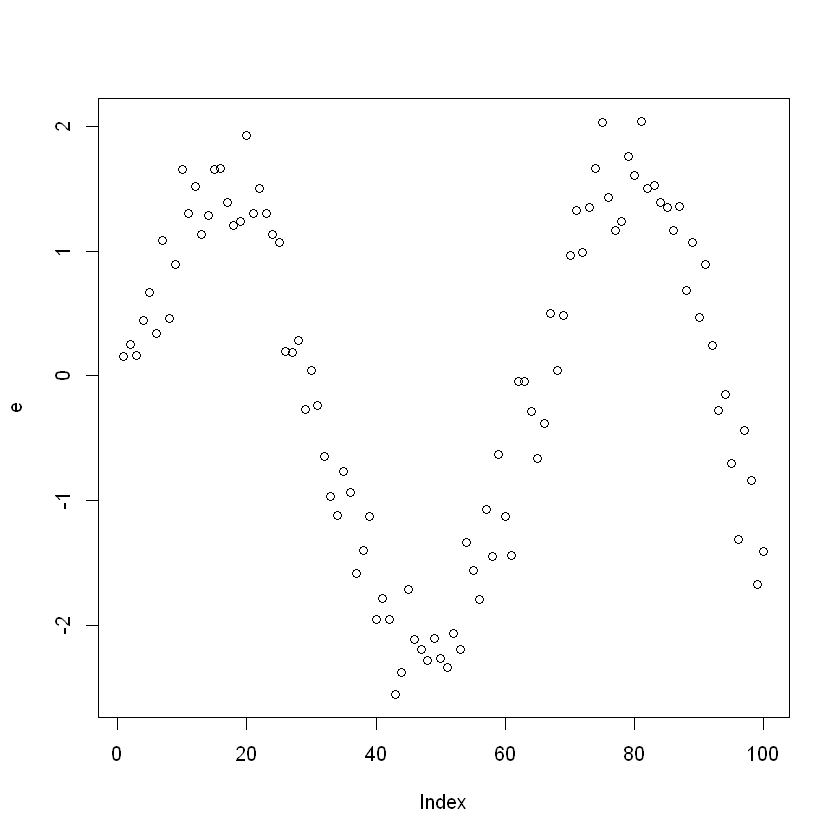

In [10]:
e <- y-predict(fit)
plot(e)

Any kind of pattern in the residuals indicates model bias, as we clearly haven't included the sin term in our model, the bias is clear here. Note this isn't obvious by simply plotting the data.

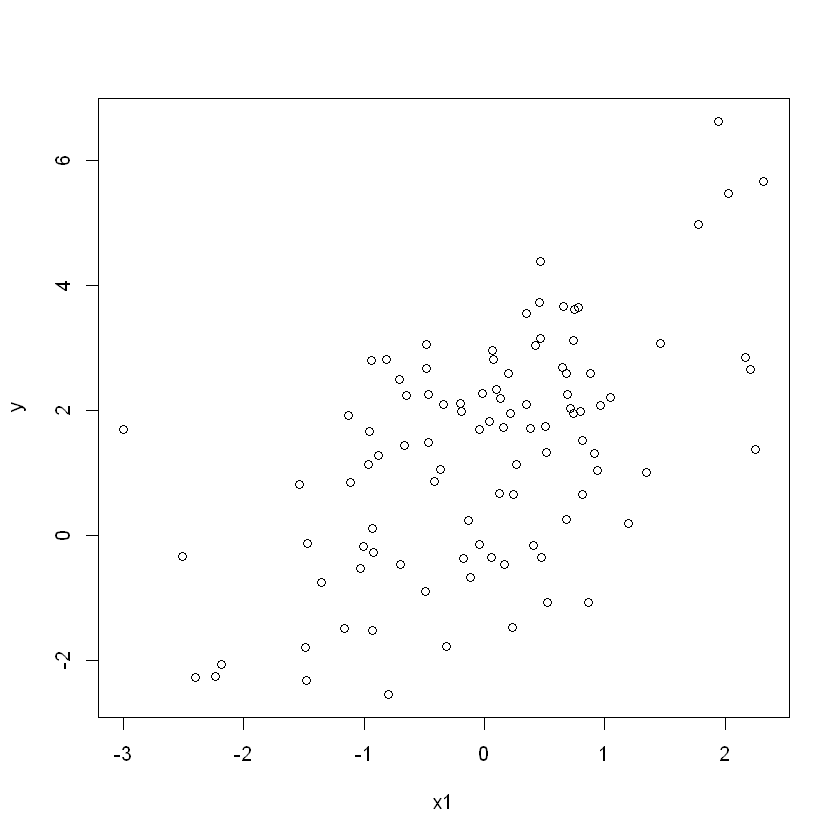

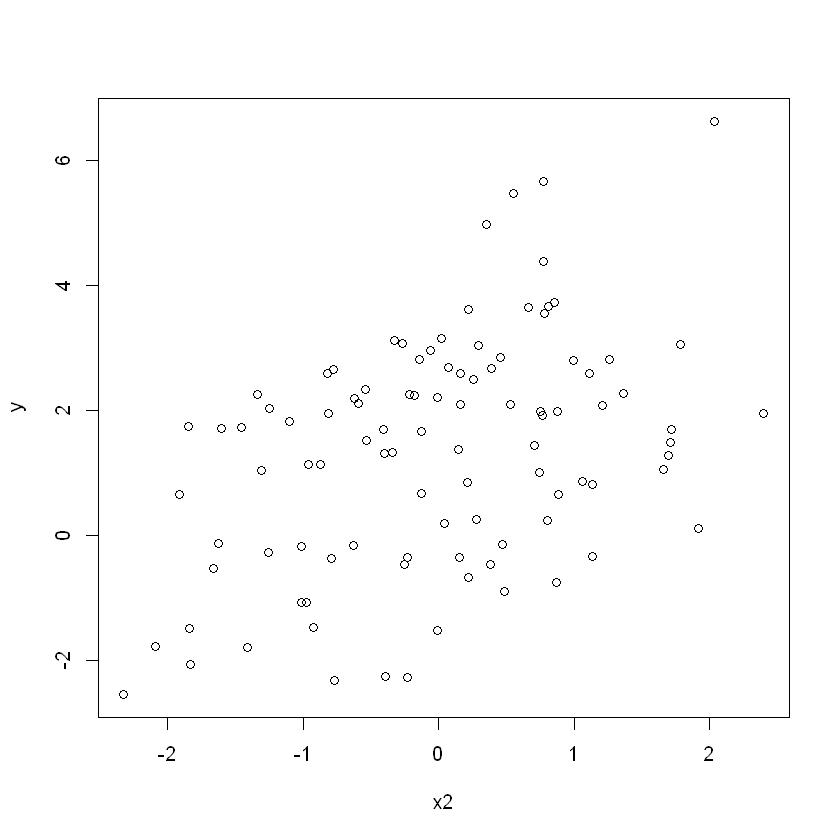

In [11]:
plot(x1,y)
plot(x2,y)

### Model Variance & Variance Inflation

In a "perfect world", with infinite data, we could train a model perfectly; in reality we can never do this. If you resimulate any of models above, fresh sets of data will be drawn and the model summaries and coefficients will change each time. This concept is known as "model variance". If the parameters of the model change greatly when the data is resampled there is a high model variance, if the change is small there is a low model variance. One way of increasing model variance with linear models is by including data that is correlated. The code below generates a model where the first two features are highly correlated and the third is uncorrelated.

In [9]:
# install.packages('car', repos='http://cran.us.r-project.org')
library(car)
n<-100
x1 <- rnorm(n)
x2 <- x1+0.1*rnorm(n)
x3 <- rnorm(n)
y <- x1 + x2 + x3 + rnorm(n)
fit <- lm(y~x1+x2+x3)

Defining x1 and x2 in this way means they will be highly correlated where as neither will be correlated with x3.

In [10]:
cor(x1,x2)
cor(x1,x3)
cor(x2,x3)

[1] 0.9944822

[1] -0.0565477

[1] -0.05641789

If you repeatedly simulate the model you will notice the coefficients of x1 and x2 vary greatly, whereas the coeffcient of x3 is much more stable.

In [7]:
summary(fit)


Call:
lm(formula = y ~ x1 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43643 -0.61970 -0.08984  0.64008  2.57535 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04387    0.10002   0.439    0.662    
x1           2.07085    0.08897  23.276  < 2e-16 ***
x3           0.89076    0.10004   8.904 3.11e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9875 on 97 degrees of freedom
Multiple R-squared:  0.8695,	Adjusted R-squared:  0.8668 
F-statistic: 323.1 on 2 and 97 DF,  p-value: < 2.2e-16


The reason for this variation is the correlation between x1 and x2. A useful R function to assess this effect is the vif in the car package. vif stands for variance inflation factor.

In [8]:
vif(fit)

x1      x3 
1.00314 1.00314

Larger values of variance inflation mean the coefficients will change each time the model is resimulated, or in a real world application, when another set of data is drawn from the population.

### Transforming the Data

Linear regression can be used when the underlying data is not in fact linear. For example we can use linear regression for example we can use linear regression for data with a qradratic, cubic or any polynomial trend and for exponential data.

The data uploaded and plotted below is the population of Angola

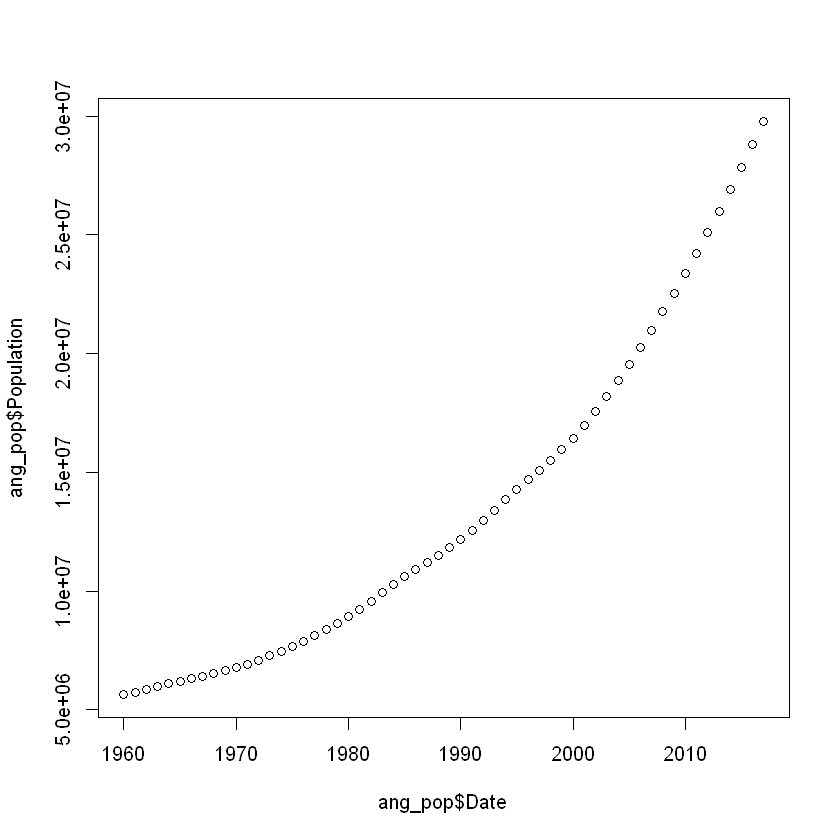

In [17]:
ang_pop <- read.csv("angola_pop.csv")
plot(ang_pop$Date,ang_pop$Population)

This graph looks like an exponential increase, we could use regression to fit a general exponential relationship to the data. Specifically:

$$ population = p q^{(date-1960)} $$

This model has the advantage of being very interpretable. In 1960 the population was p and increased by a factor of q every subsequent year. A logarithmic transformation will make this a linear relationship between population and date, to which we can fit a linear model

$$\ln{population} = \ln{p} + (date-1960)\ln{q}$$

Comparing this to the standard 1-dimensional linear regression equation

$$y = a + bx$$

Shows we need to transform the population data by taking the natural logarithm and the date by subtracting 1960. The code below transforms the data and fits a linear model to it.

In [27]:
# transforming the data
x <- ang_pop$Date - 1960
y <- log(ang_pop$Population)
# fitting a model
fit <- lm(y~x)
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04231 -0.02637 -0.01778  0.02480  0.10133 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.544e+01  9.819e-03  1572.9   <2e-16 ***
x           2.992e-02  2.971e-04   100.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03788 on 56 degrees of freedom
Multiple R-squared:  0.9945,	Adjusted R-squared:  0.9944 
F-statistic: 1.014e+04 on 1 and 56 DF,  p-value: < 2.2e-16


Taking the exponential of the coeffients gets back to p and q in the original formulation

In [28]:
print(exp(fit$coeff[1]))
print(exp(fit$coeff[2]))

(Intercept) 
    5099393 
       x 
1.030373 


So the initial population should be around 509939 and the population should increase by a factor of around 1.030373 each year. We can check this against the initial entries population data. 

In [30]:
print(head(ang_pop$Population))
print(tail(ang_pop$Population))

[1] 5643182 5753024 5866061 5980417 6093321 6203299
[1] 25096150 25998340 26920466 27859305 28813463 29784193


A plot also confirms there is a reasonable match between the model and the data

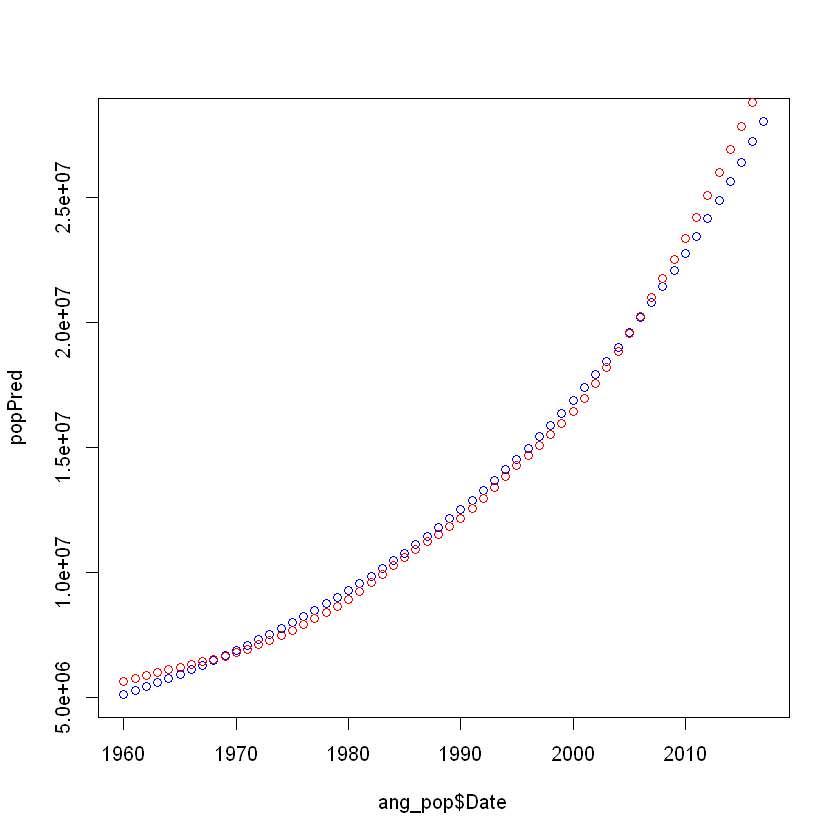

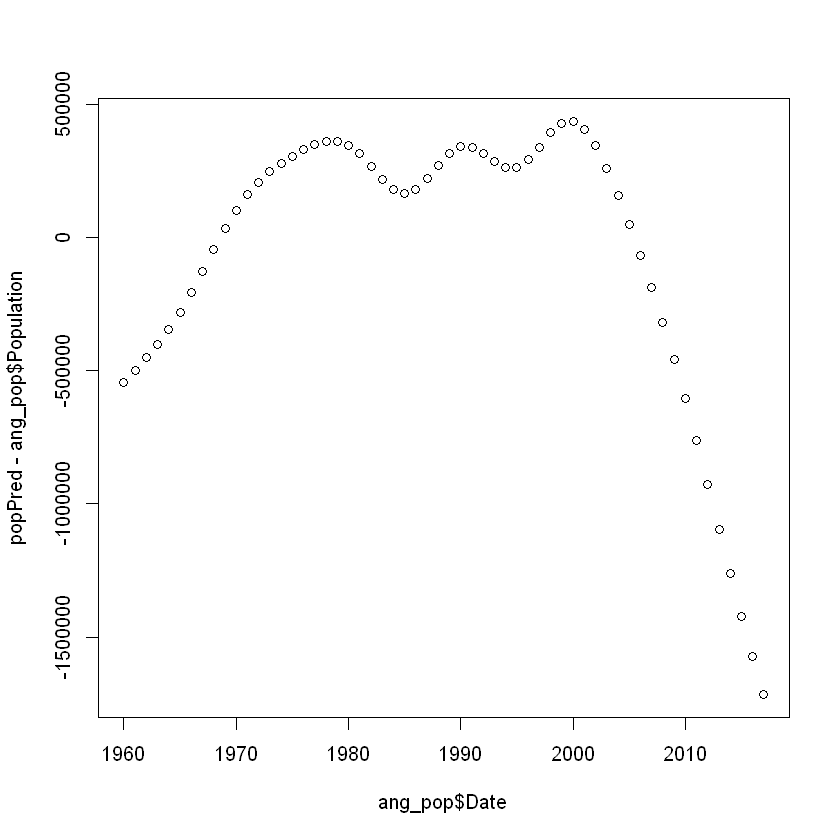

In [31]:
# plot of the predicted data
plot(ang_pop$Date,popPred,col="blue")
points(ang_pop$Date,ang_pop$Population,col ="red")
# the residuals for this plot are
plot(ang_pop$Date,popPred-ang_pop$Population)

The residuals seem to indicate a systematic pattern in the error, however the exponential fit is reasonable. 

# Lab

## Mandatory

* Review the code in the Significance of Coefficients section, experiment with the noise factor and make sure you understand how different values effect the p-values of the coefficients
* Review the code in Goodness of Fit section, experiment with the noise factor and make sure you understand how different values effect the Goodness of Fit $R^{2}$ diagnostic
* Using a jupyter notebook, fit a regression model to predict income using the income dataset in the directory "resources\DSBDA_code_data\Chapter 6" and produce a report on your results. Your report should include:
    - Exploratory plots of the data including correlation plots
    - A regression model to predict income and a plot of actual incomes against the predicted incomes
    - An interpretation of the previous plots
    - A residuals plot and an interpretation of the residuals
    - An interpretation of the coefficients and their significance/p-values
    - An interpretation of the "Goodness of Fit"
* Go through each of the EMC questions (below) and make sure you can relate the answer to the theory above

__Brian Caffo's (see above) videos on model selection might help you choose which features to select__

## Extension

* Go through Chapter 6 of the EMC Data Science and Big Data Analytics book, and make detailed notes.
* Complete the Kahn academy multi-variable calculus and linear algebra courses, how do these topics relate to linear regression.
* Make detailed notes on Brian Caffo's videos and try and repeat his R examples